# 90°剥離試験の解析

        0       1       2        3        4
0   0.000  30.070  72.570  143.700  196.620
1  68.090  62.060  55.340   95.410   70.620
2   4.747   2.256   3.426    5.377   10.576
        0        1       2
0    0.00   58.700  107.07
1  203.47  119.780  120.17
2    3.57    1.788    1.77
       0       1        2        3
0   0.00  25.480  113.820  166.630
1  54.79  86.590  166.690  132.690
2   4.49   0.475   11.478    4.573
        0        1        2   3
0    0.00   58.700  107.070 NaN
1  203.47  122.610  104.220 NaN
2    3.57    4.291    9.193 NaN


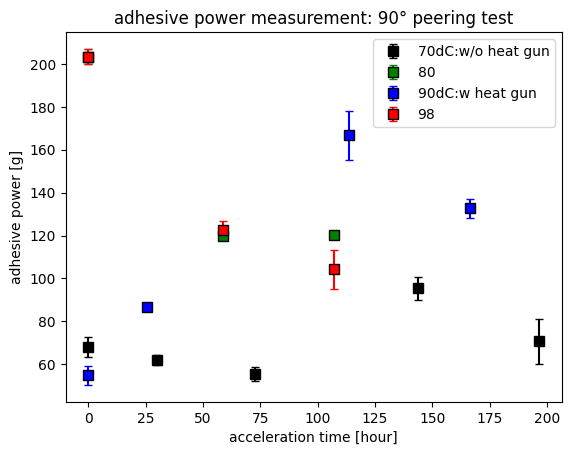

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

T_accel =[70,80,90,98]
fig, ax = plt.subplots()
colors = ['black','green','blue','red']
ntemp = T_accel.__len__()
label_list = ['70dC:w/o heat gun' ,'80' ,'90dC:w heat gun' ,'98']

for itemp in range(ntemp):
    temp_accel = T_accel[itemp]
    filename = f'peering_{temp_accel}dC.csv'

    df = pd.read_csv(filename,sep="\t"
                     ,skiprows=1
                     #,names=['1','2','3','4']
                     ,header=None
                     )
    print(df)
    weight_dataset = df.to_numpy()
    t_accel = weight_dataset[0]
    weight_break = weight_dataset[1]
    weight_err = weight_dataset[2]

    ax.errorbar(t_accel, weight_break, yerr=weight_err, capsize=3, fmt='s'
                , ecolor=colors[itemp], color=colors[itemp],ms=7, mec='k'
                , label=label_list[itemp])

ax.set_xlabel('acceleration time [hour]')
ax.set_ylabel('adhesive power [g]')
#plt.yscale('log')
plt.legend(loc='upper right')
ax.set_title('adhesive power measurement: 90° peering test')
plt.show()


標準誤差をスプレッドシートで計算するのが面倒くさい。でも、時間情報をPythonで計算するのも面倒くさそう。


In [11]:
from datetime import datetime

def date_difference_in_hours(date1, date2):
    # 日付文字列をdatetimeオブジェクトに変換
    datetime1 = datetime.strptime(date1, '%Y-%m-%d %H:%M:%S')
    datetime2 = datetime.strptime(date2, '%Y-%m-%d %H:%M:%S')

    # 2つのdatetimeオブジェクトの差を計算
    time_difference = datetime2 - datetime1

    # 差を時間に変換
    hours = time_difference.total_seconds() / 3600

    return hours

# テスト用の日付文字列
date_string1 = '2023-11-22 23:30:50'
date_string2 = '2023-11-23 10:15:30'

# 関数を呼び出して時間に変換
hours_difference = date_difference_in_hours(date_string1, date_string2)

# 結果を表示
print(f"日付1: {date_string1}")
print(f"日付2: {date_string2}")
print(f"時間差: {hours_difference:.2f} 時間")


日付1: 2023-11-22 23:30:50
日付2: 2023-11-23 10:15:30
時間差: 10.74 時間


2 days, 22:51:50
